# Grant Oie | INET 4061 Lab 3

###<font color=red>DELETE BEFORE SUBMISSION</font><br>

Outline:
 - Overview<br>
 - Models<br>
 - Conclusion



# OVERVIEW<br>

#### Business Problem

In this Lab our 'business problem' is: using 2 fabricated datasets, we are attempting to understand the statistical difference (if any) that age and race has on voting.

#### __<font color=blue>Brief Explanation of a One-Way ANOVA test</font><br>__

ANOVA (analysis fo variance) is a statistical inference test allowing you to compare statistics accross multiple groups. A one-way ANOVA test is...

what are the assumptions, how you interpret it

#### Defintions
F-test
F-stat
Bonferroni Correction

#### Tukey's test
why would you use it

#### what are we doing in this assignment from dataset and objective perspective

# DATA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [152]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})

#Count of each race in dataset
print(voter_frame.race.value_counts())
print(voter_frame.describe())

groups = voter_frame.groupby("race").groups

# Extract individual group ages
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

white       515
hispanic    244
black       147
other        50
asian        44
Name: race, dtype: int64
               age
count  1000.000000
mean     47.773000
std       5.308074
min      34.000000
25%      44.000000
50%      48.000000
75%      51.000000
max      66.000000


F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

__Dataset 1 Description__ <br>
This dataset contains 1000 individuals of varying races (proportion for each race set to [0.05, 0.15 ,0.25, 0.05, 0.5] for races ["asian","black","hispanic","other","white"], respectively). The mean age accross the data set is 47.7 years, with a standard deviation of 5.3 years.

__Null Hypothesis:__ There is no difference in mean age across the groups

__F Statistic = 1.774<br>__
__p-value = 0.1317__

__Conclusion__<br>
P is not low enough to reject null hypothesis, so we can't say the mean age between groups is different


In [151]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

#returns a combined array where white ages correspond to voter_race=white
voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame_2 = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame_2.groupby("race").groups   

print(voter_frame_2.race.value_counts())
print(voter_frame_2.describe())


# Extract individual groups
asian2 = voter_age[groups["asian"]]
black2 = voter_age[groups["black"]]
hispanic2 = voter_age[groups["hispanic"]]
other2 = voter_age[groups["other"]]
white2 = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian2, black2, hispanic2, other2, white2)

white       515
hispanic    244
black       147
other        50
asian        44
Name: race, dtype: int64
              age
count  1000.00000
mean     49.14100
std       5.72205
min      29.00000
25%      45.00000
50%      49.00000
75%      53.00000
max      72.00000


F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

__Dataset 2 Description__ <br>
This dataset contains 1000 individuals of varying races (proportion for each race set to [0.05, 0.15 ,0.25, 0.05, 0.5] for races ["asian","black","hispanic","other","white"], respectively). This dataset differs from Dataset 1 in that the samples with race=white are given ages based on a different distribution. The mean age accross the data set is 49.1 years, with a standard deviation of 5.7 years.

Null Hypothesis: There is no difference in mean age across the groups

F Statistic = 10.16<br>
p-value = 4.56e-08

P is significantly low so we can reject null hypothesis, meaning that the means are different accross groups

# Exploratory Data Analysis

I ran two sets of exploratory data analysis on these datasets, with a goal of visualizing the difference within each dataset, and the differences accross the two datasets.<br><br>

#### Analysis One: Age Histogram by Race 
The first analysis I performed was creating an age histogram for each race within its dataset, graphing them all on the same age axis so any shifts would become more apparent. I also added a mean line for each race so that I could get a feel for where the middle of the data sits within each group.<br><br>

In Dataset 1, all of the distributions have a semi-normal shape, with the Asian histogram showing a bi-modal shape, although it is hard to tell with these sample sizes. The mean lines don't show any significant flucuation, with all groups falling between ~47.5 and 49.<br><br>

In Dataset 2, each race again seems to have a somewhat normal shape, including the Asian samples. The major difference between this set of histograms and those of Dataset 1 is that the White mean is slightly above 50, whereas the other means sit in a range slighly below (as expected given data construction.)<br><br>

#### Analysis Two: Boxplots
In this analysis I wanted to try and observe some more detail behind the skewing of Dataset 2 based on the increased white age. I first ran a similar analysis as in Analysis One except with boxplots. In the boxplots of dataset you can see tha  the white has a slighly taller box than the other races as compared within Dataset 2. Dataset 1 looks more closely spread accross all races. I also ran a boxplot for all data in Dataset 1 and Dataset 2 and set them next to eachother. You can clearly see the higher skew being introduced in Dataset 2 through this graph, although it is not highly apparent by any means.  

In [16]:
%matplotlib inline

# voter_frame.hist(bins=15,figsize=(20,15))
print(voter_frame.head())
type(voter_frame)

       race  age
0     black   51
1     white   49
2  hispanic   51
3     white   48
4     asian   56


pandas.core.frame.DataFrame

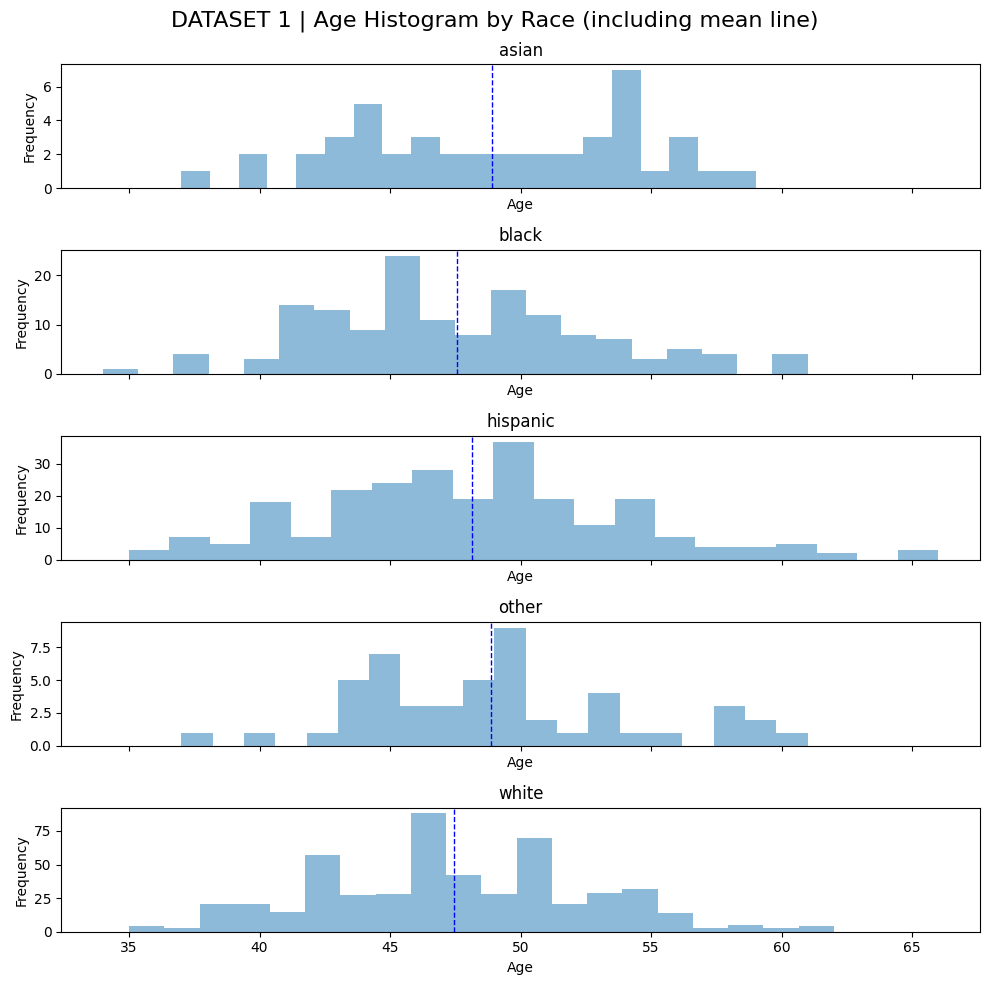

In [70]:

race_grouped_1 = voter_frame.groupby("race")
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(nrows=len(race_grouped_1),figsize=(10,10),sharex=True)
fig.suptitle("DATASET 1 | Age Histogram by Race (including mean line)",fontsize=16)

for i, (name, group) in enumerate(race_grouped_1):
    ax[i].hist(group["age"], bins=20, alpha=0.5)
    ax[i].axvline(group["age"].mean(), color='b', linestyle='dashed', linewidth=1)
    ax[i].set_title(name)
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Age")


# Formatting tips used from
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

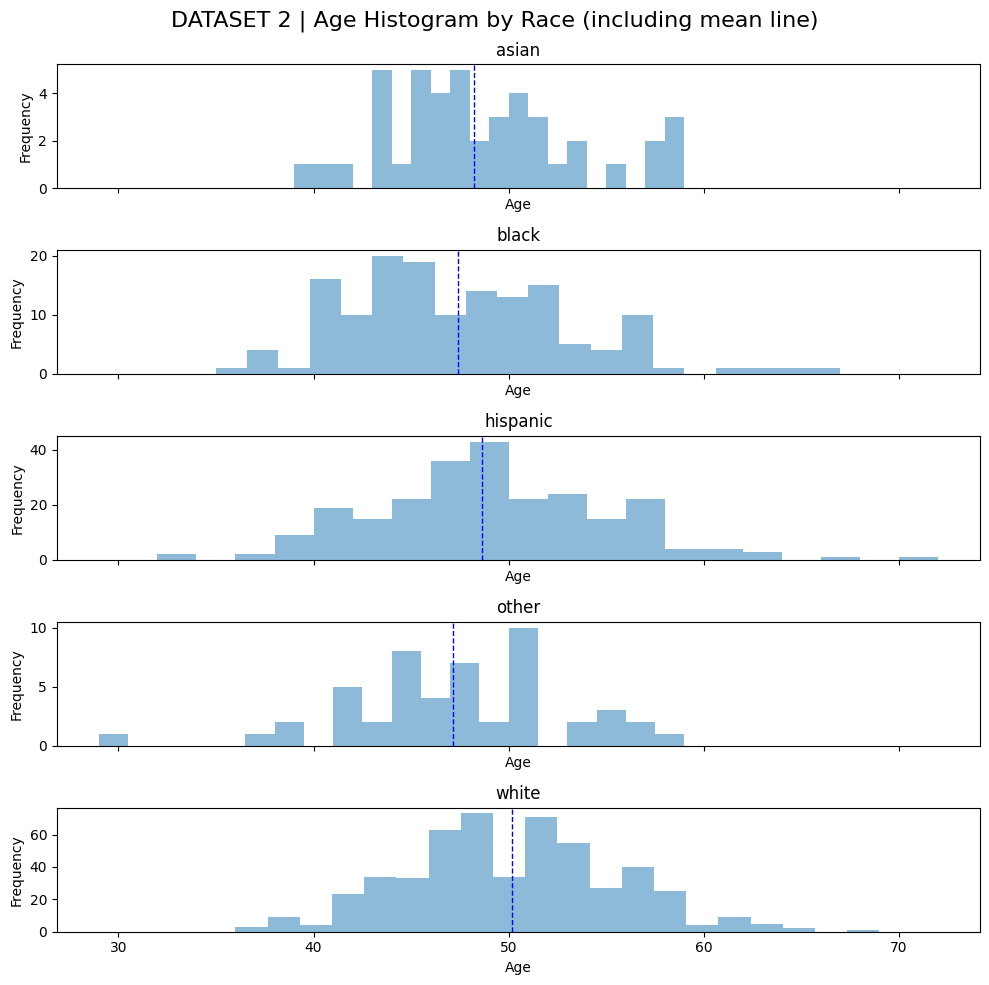

In [128]:
race_grouped_2 = voter_frame_2.groupby("race")
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(nrows=len(race_grouped_2),figsize=(10,10),sharex=True)
fig.suptitle("DATASET 2 | Age Histogram by Race (including mean line)",fontsize=16)

for i, (name, group) in enumerate(race_grouped_2):
    ax[i].hist(group["age"], bins=20, alpha=0.5)
    ax[i].axvline(group["age"].mean(), color='b', linestyle='dashed', linewidth=1)
    ax[i].set_title(name)
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Age")


# Formatting tips used from
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

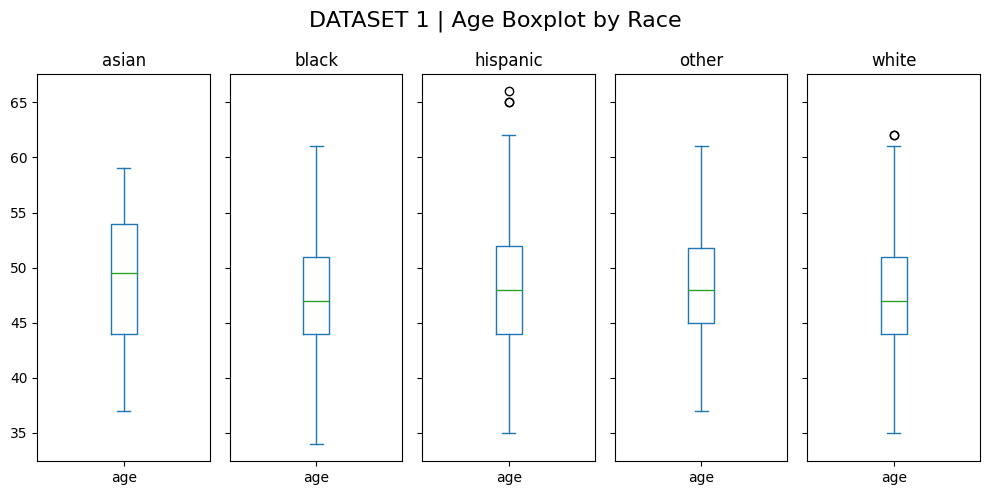

In [124]:
fig, ax = plt.subplots(nrows=1,ncols=len(race_grouped_1),figsize=(10,5),sharey=True)
fig.suptitle("DATASET 1 | Age Boxplot by Race",fontsize=16)

i=0
for name, group in race_grouped_1:
    group['age'].plot.box(ax=ax[i],grid=False)
    ax[i].set_title(name)
    i+=1

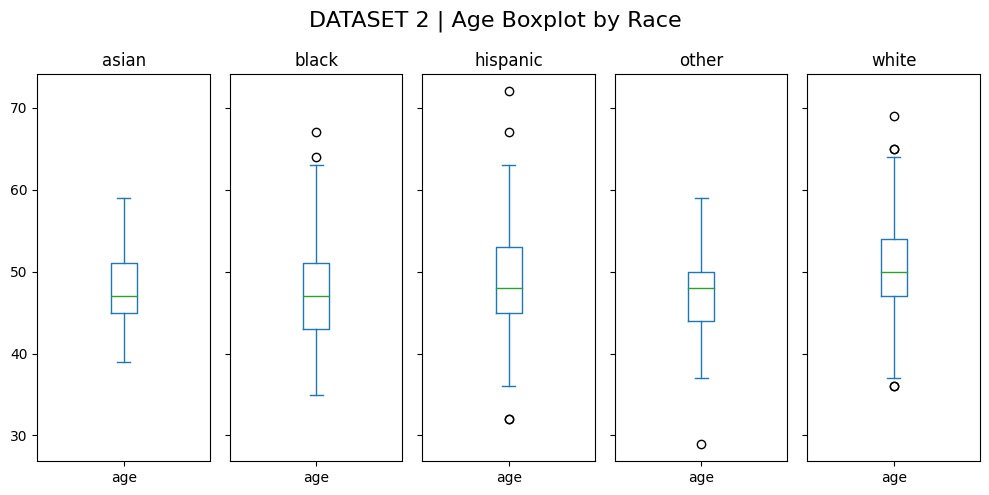

In [125]:
fig, ax = plt.subplots(nrows=1,ncols=len(race_grouped_2),figsize=(10,5),sharey=True)
fig.suptitle("DATASET 2 | Age Boxplot by Race",fontsize=16)

i=0
for name, group in race_grouped_2:
    group['age'].plot.box(ax=ax[i],grid=False)
    ax[i].set_title(name)
    i+=1

{'whiskers': [<matplotlib.lines.Line2D at 0x2650bbc7790>,
 'caps': [<matplotlib.lines.Line2D at 0x2650bbc7cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2650bbc74f0>,
 'medians': [<matplotlib.lines.Line2D at 0x2650bb9c250>,
 'fliers': [<matplotlib.lines.Line2D at 0x2650bb9c4f0>,
 'means': []}

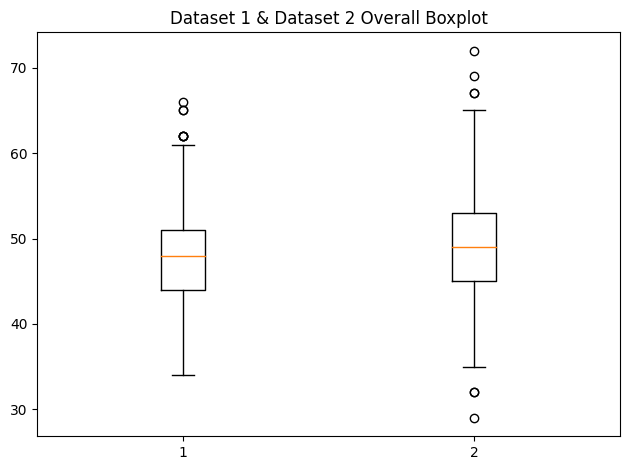

In [150]:
combined = pd.DataFrame().assign(d1=voter_frame.loc[:,'age'], d2 = voter_frame_2.loc[:,'age'])
plt.title("Dataset 1 & Dataset 2 Overall Boxplot")
plt.boxplot(combined)


# Models

One-way ANOVA with F-test
T-test with Bonferroni correction
Tukey test

voter_frame

In [155]:
print("Dataset 1 | F-Test")
stats.f_oneway(asian, black, hispanic, other, white)

Dataset 1 | F-Test


F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [2]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ XXXX', data=voter_frame).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# https://colab.research.google.com/drive/1u5suaygQneVaOEVh4U6FdTwrJNsEpm3l?authuser=1#scrollTo=BGT2Ihzz6P75

ModuleNotFoundError: No module named 'statsmodels'

__Dataset 1 Description__ <br>
This dataset contains 1000 individuals of varying races (proportion for each race set to [0.05, 0.15 ,0.25, 0.05, 0.5] for races ["asian","black","hispanic","other","white"], respectively). The mean age accross the data set is 47.7 years, with a standard deviation of 5.3 years.

__Null Hypothesis:__ There is no difference in mean age across the groups

__F Statistic = 1.774<br>__
__p-value = 0.1317__

__Conclusion__<br>
P is not low enough to reject null hypothesis, so we can't say the mean age between groups is different


In [156]:
print("Dataset 2 | F-Test")
stats.f_oneway(asian2, black2, hispanic2, other2, white2)

Dataset 2 | F-Test


F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)